#Une étude de cas: qui survivra au terrible naufrage du Titanic?

1. Pour rappel, voici la ref de la première vidéo: https://youtu.be/1bJYEE9qgS4

2. En suivant le lien ci-dessous, vous trouverez toutes les informations dont vous avez besoin pour cette étude de cas: [data set](https://www.kaggle.com/c/titanic/data)

##1) Quel objectif initial vous êtes-vous fixé?


<font color='red'> Répondez à cette question ici

---
F1 60% 

Recall de 80%

Minimiser le recall



##2) Exploration des données

Pour rappel, voici la ref de la seconde vidéo : https://youtu.be/u64sWJEP4S0

Exploratory Data Analysis

Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.


1.   Analyse de la forme:

  a. Identification de la target: <font color='red'> Quel est votre target? </font>

  b. Nombre des lignes et de colonnes: <font color='red'> Quelle est la forme de votre dataset? </font>

  c. Identification des valeurs manquantes: <font color='red'> Le dataset contient-il des données manquantes? </font>

  d. Types de variables: <font color='red'> Quelles sont les types de vos données?</font>

2.   Analyse du fond:

  a. Visualisation de la target <font color='red'>

	b. Compréhension des différentes variables

	c. Visualisation des relations

<font color='red'> 2.1 Analyse de la forme: Répondez-ici </font>

---


a. Survived

---


b.891, 12

---


c. 
En général nous n'avons pas beaucoup de données manquante

Groupe 1: **age** qui est à 20% de données manquante

Groupe 2: Nous pouvons voir dans **Cabine** qu'il y a beaucoup de données manquante 77%




---


d. 10 quantitatives, 2 qualitatives 



In [ ]:
for col in df.select_dtypes('float'):
  print(col)

Age
Fare


In [ ]:
for col in df.select_dtypes('object'):
  print(col)

Name
Sex
Ticket
Cabin
Embarked


##3) Quelles sont les variables que je vais sélectionner pour la suite de mon travail ?


<font color='red'> Répondez-ici </font>


Les variables qui seraient intéressant d'utiliser pour la suite du travail serai : l'age, pClasse, Embarked, sex,Fare



## 4) Explorer les données relatives au Titanic ci-dessous

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
import csv

pd.set_option('display.max_column',12)
data = pd.read_csv('/content/drive/My Drive/train.csv')
data.head()

Mounted at /content/drive/


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = data.copy()
df.shape

(891, 12)

In [ ]:
df.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

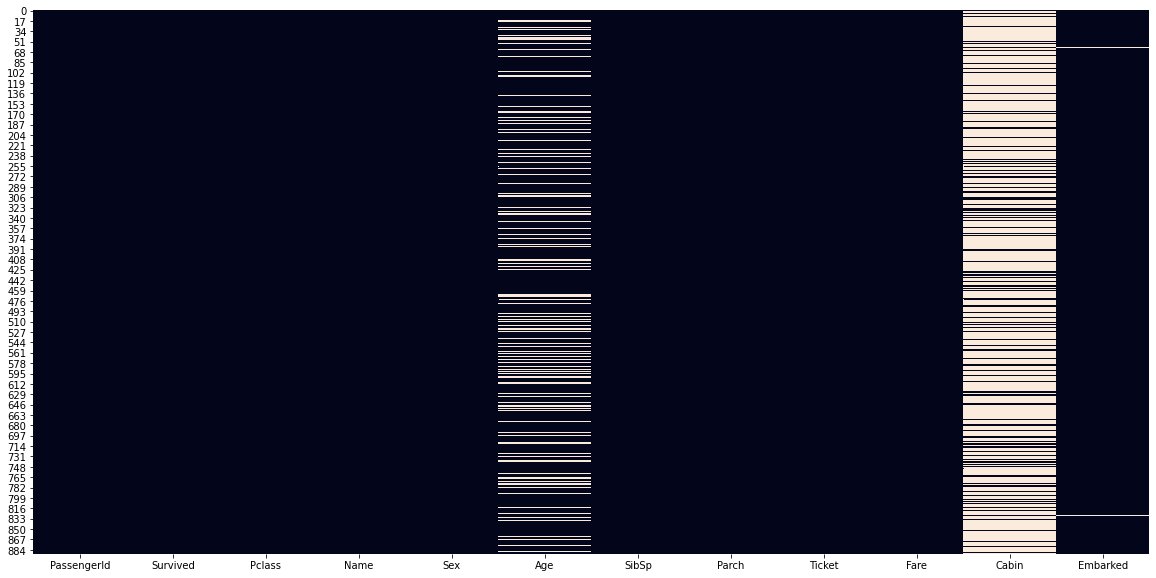

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False);

     Pclass   Age  SibSp  Parch     Fare  Embarked  gender_factor
0         3  22.0      1      0   7.2500         1              1
1         1  38.0      1      0  71.2833         2              0
2         3  26.0      0      0   7.9250         1              0
3         1  35.0      1      0  53.1000         1              0
4         3  35.0      0      0   8.0500         1              1
..      ...   ...    ...    ...      ...       ...            ...
885       3  39.0      0      5  29.1250         3              0
886       2  27.0      0      0  13.0000         1              1
887       1  19.0      0      0  30.0000         1              0
889       1  26.0      0      0  30.0000         2              1
890       3  32.0      0      0   7.7500         3              1

[712 rows x 7 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


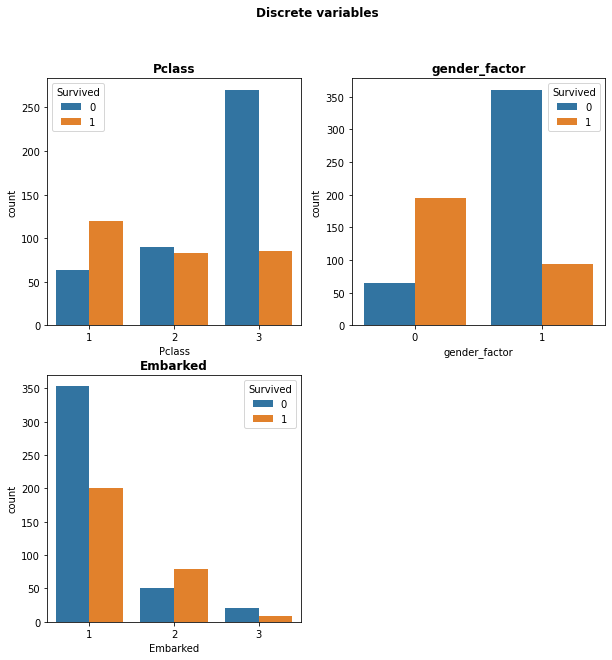

In [ ]:
data.dropna(subset=['Embarked'],inplace = True)
drop_features = ['Survived', 'PassengerId', 'Name', 'Ticket','Sex','Cabin']

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Transform the gender column
data['gender_factor'] = le.fit_transform(data.Sex)
data['Embarked'] = data['Embarked'].replace('S', 1)
data['Embarked'] = data['Embarked'].replace('C', 2)

data['Embarked'] = data['Embarked'].replace('Q', 3)

data.dropna(subset=['Age'],inplace = True)
data.dropna(subset=['Embarked'],inplace = True)

X = data.drop(columns = drop_features)
y = data['Survived']

print(X)

cat_feature = ['Pclass', 'gender_factor', 'Embarked']
num_feature = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize = (10, 10))
plt.suptitle('Discrete variables', weight = 'bold')
i = 0
for feature in cat_feature:
    i += 1 
    plt.subplot(ceil(len(cat_feature)/2), ceil(len(cat_feature)/2), i)
    sns.countplot(X[feature], hue = y)
    plt.title(feature, weight = 'bold')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Future

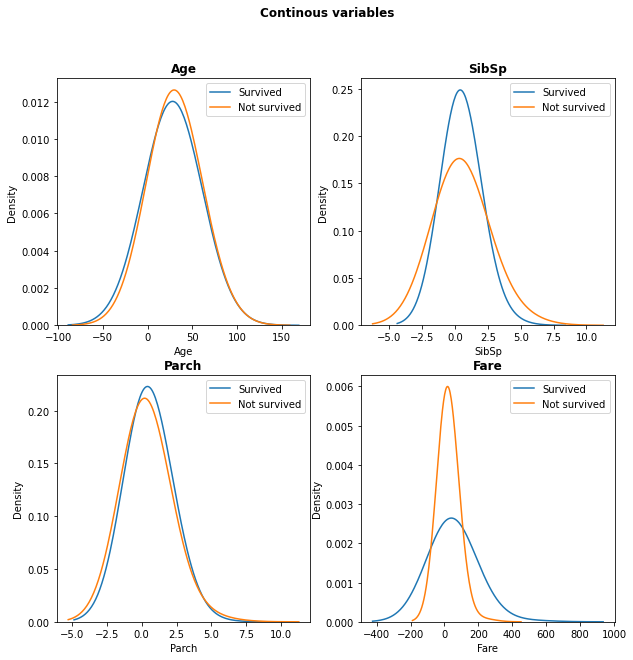

In [ ]:
plt.figure(figsize = (10, 10))
plt.suptitle('Continous variables', weight = 'bold')
i = 0
for feature in num_feature:
    i += 1 
    plt.subplot(ceil(len(cat_feature)/2), ceil(len(cat_feature)/2), i)
    sns.distplot(a = X[feature][y.to_numpy(dtype = bool)], hist = False, label = 'Survived', kde_kws = {'bw' : 2})
    sns.distplot(a = X[feature][np.invert(y.to_numpy(dtype = bool))], hist = False, label = 'Not survived', kde_kws = {'bw' : 2})
    plt.legend()
    plt.title(feature, weight = 'bold')
plt.show()

##5) Pre-processing
 
Pour rappel, voici la ref de la troisième vidéo : https://youtu.be/x8yu8sq8mdw
 
Objectif: transformer le data pour le mettre dans un format propice au machine learning
 
  1. Création du Train Set / Test Set 
 


   <font color='red'> Pourquoi créer un train set, un test set, un validation set? [plus d'info ici](https://youtu.be/w_bLGK4Pteo) </font>
 
  2. Élimination des NaN : 
  

  
  <font color='red'> Comment éliminer les NaN?</font> [plus d'info ici](https://youtu.be/QVEJJNsz-eM)
  3. Encodage


  <font color='red'> Comment encoder les données textuelles? </font>

<font color='red'> Répondez-ici </font>
1.
Quand nous faisons du machine learning on divise toujours notre dataset en trois: le train Set -> ou les données sont utilisés pour entrainer le modèle

un test Set -> reserver uniquement à l'évaluation du modèle

le validation set -> on divise notre dataset en une troisième partie qui va nous permettre de chercher les réglages du modèle qui donne les meilleurs performances tout en gardant de coté les données du test set pour évaluer la machine sur des données qu'elle n'aura jamais vu

2.
  dropna(), imputation, colonne"vides" 
 data.dropna(subset=['Age'],inplace = True)
data.dropna(subset=['Embarked'],inplace = True)
  

  
3. 
  data['gender_factor'] = le.fit_transform(df.Sex)
data['Embarked'] = data['Embarked'].replace('S', 1)
data['Embarked'] = data['Embarked'].replace('C', 2)

data['Embarked'] = data['Embarked'].replace('Q', 3)
 


##6) Traiter les données ci-dessous

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import MissingIndicator

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)


##7) Souhaitez-vous revoir votre objectif initial ?

Notez qu'il n'y a pas de bonne réponse à cette question. Cependant, à la suite de l'exploration des donées et du traitement des données, vous aurez peut-être envie de revoir votre objectif initial.

<font color='red'> Répondez à cette question ici

 
##8) Modelling
 
Pour rappel, voici la ref de la quatrième vidéo: https://youtu.be/r58meM7ieaQ
 
Objectif: développer un modèle de machine learning capable de répondre a l'objectif final.
  
  1. Définir une fonction d'évaluation <font color='red'> Quelle est votre fonction d'évaluation? </font>
  2. Entrainement de différents modèles <font color='red'> Quelles modèles allez-vous sélectionner ? </font>
  3. Optimisation avec GridSearchCV <font color='red'> Pq utiliser un GridSearchCV? </font>
  4. Analyse des erreurs et retour au Preprocessing / EDA <font color='red'> Quelles erreurs peuvent survenenir à ce moment de notre étude de cas? </font> 
  5. Learning Curve et prise de décision
  <font color='red'> Pourquoi dessiner une learning curve? </font>

<font color='red'> Répondez-ici </font>
2. Malgrés que nous avons un meilleur recall et f1 score avec le KNN. Je décide d'utiliser le SVC car graphiquement le validation score finit par se rapprocher du train score

3. Nous utilisons le GridSearch pour avoir optimiser les paramètre de notre modèle et ainsi avoir de meilleur score recall et f1

4. On peut se retrouver avec un overfitting ou underfitting

5. Celà nous permet de vois à partir de quel moment notre algorithme commence à apprendre et à s'adapter aux données. Nous pouvons aussi voir si nous sommes en overfitting, underfitting.

##9) Construisez votre modèle ici

In [ ]:

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluation(model):

  
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

SVM
[[78  7]
 [18 40]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        85
           1       0.85      0.69      0.76        58

    accuracy                           0.83       143
   macro avg       0.83      0.80      0.81       143
weighted avg       0.83      0.83      0.82       143

KNN
[[74 11]
 [17 41]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        85
           1       0.79      0.71      0.75        58

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



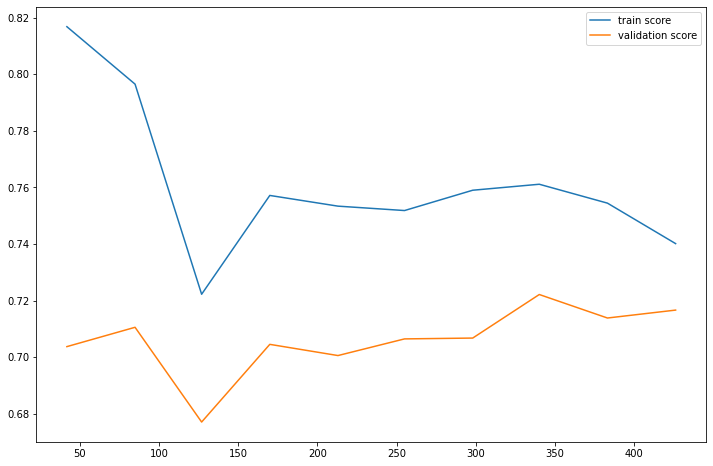

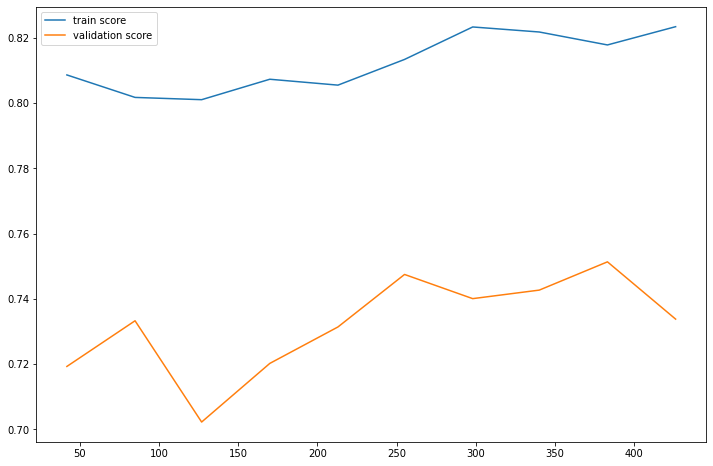

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline

preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

dict_of_models = {'SVM' : SVM,
                  'KNN' : KNN
                 }

for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x7fb0b38eb7b8>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel

In [ ]:

hyper_params = {'svc__gamma':[1e-3, 1e-4],
                'svc__C':[1, 10, 100, 1000]
                }

grid = GridSearchCV(SVM, hyper_params, scoring='recall', cv=4)

grid.fit(X_train, y_train)

print(grid.best_params_)
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__C': 100, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.75      0.72      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



[[75 10]
 [21 37]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        85
           1       0.79      0.64      0.70        58

    accuracy                           0.78       143
   macro avg       0.78      0.76      0.77       143
weighted avg       0.78      0.78      0.78       143



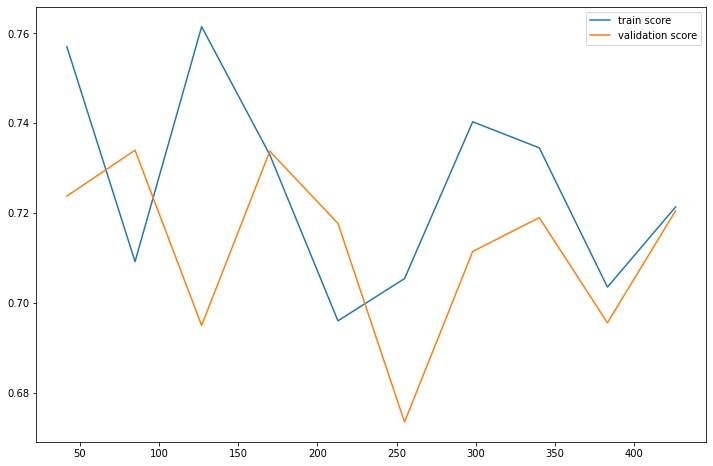

In [ ]:
evaluation(grid.best_estimator_)